# HR Analytics Project

In [1]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/2000/1*zQqQvaiIsOYGdYhRyOCyAQ.jpeg")

# 1.Introduction

#### Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced.Some forms of attrition are unavoidable, like if an employee is retiring or is moving to another city. But after a certain threshold, attrition can make a big dent in your company’s bottom line as well as its culture. In this primer, we tell you all you need to know about employee attrition, and how to measure it accurately. Attrition is an inevitable part of any business. There will come a time when an employee wants to leave your company – for either personal or professional reasons. But when attrition crosses a particular threshold, it becomes a cause for concern. For example, attrition among minority employee groups could be hurting diversity at your organization. Or, attrition among senior leaders can lead to a significant gap in organizational leadership.Employee attrition occurs when the size of your workforce diminishes over time due to unavoidable factors such as employee resignation for personal or professional reasons. Employees are leaving the workforce faster than they are hired, and it is often outside the employer’s control. For example, let’s say that you have opened a new office designated as the Sales Hub for your company. Every salesperson must work out of this office – but a few employees cannot relocate and choose to leave the company. This is a typical reason for employee attrition. But there are other reasons for attrition as well, including the lack of professional growth, a hostile work environment, or declining confidence in the company’s market value. Weak leadership is another factor that often drives attrition among employees.

#### In this article, I would like to present how to predict employee attrition with machine learning. For analysis I will use a data set created by IBM data scientists, which is available here. However, I will do a split into train and test samples to better explain you how machine learning methods can be applied to this problem. The splitted data is available at my github. The train set represents historical data about employees. In this data each sample (row) describes the employee with parameters like: age, department, distance from home, marital status, income, years at company. You can check all used descriptors here. For each employee in the train set the attrition is known (it is historical value). In test data we have employees descriptors available, however the attrition is unknown and we want to predict (compute) it with our machine learning model. (To be honest, the attrition values in test data are available, but for better explanation let’s assume that it is missing).

In [2]:
from IPython.display import Image
Image(url= "https://images.toolbox.demandshore.com/8d/ca/5393916041989ab45fef2298e78d/what-is-employee-attrition.png")

# 2.What Methods I wiil going to solve ?

### Attrition Prediction Methodology:
##### Loading The Dataset
##### Feature Selection Method Using Info Gain Of Features.
##### Train Model on Training Dataset
##### Test the model on Testing Dataset
##### Result Analysis
### MACHINE LEARNING METHODS:
### Six machine learning classification models have been used for prediction of Attrition Prediction:
##### Decision Trees
##### KNN - Kneighbors Classifier
##### AdaBoostClassifier
##### RandomForestClassifier
##### LogisticRegression
##### XGBClassifier.

# 3. Details about the dataset

#### Employee is one of the most important resource in company, where a high attrition rate indicates that the company is unable to maintain their employees. In a short term, with high attrition rate, company must pay a great money to cover the cost of turnover. While in a long term, this will affect the company's performance as employees come and go the company's performance will decline.


#### Description about the data
#### Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

#### EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#### JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#### JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#### PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

#### RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#### WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

#### Additinal Description Which will help to understand the features
#### Hourly Rate: An hourly employee is paid a wage for each hour worked, unlike a salaried employee.

#### EmployeeNumber: An Employee Number is a unique number that has been assigned to each current and former State employee and elected official in the Position and Personnel DataBase (PPDB).

#### JobLevel: Job levels, also known as job grades and classifications, set the responsibility level and expectations of roles at your organization. They may be further defined by impact, seniority, knowledge, skills, or job title, and are often associated with a pay band. The way you structure your job levels should be dictated by the needs of your unique organization and teams.

#### StockOptionLevel: Employee stock options, also known as ESOs, are stock options in the company’s stock granted by an employer to certain employees. Typically they are granted to those in management or officer-level positions. Stock options give the employee the right to buy a certain amount of stock at a specific price, during a specific period of time. Options typically have expiration dates as well, by which the options must have been exercised, otherwise they will become worthless.

# 4.Importing All Necessary libraries

In [1]:
# IMPORTS LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 5.Reading the Csv file

In [13]:
# Reading the dataset

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.¶
#### After Reading the csv file I find out that Attrition are label columns while remaning are the Features columns.

In [14]:
df.shape

(1470, 35)

#### By using shape I got 614 rows and 13 columns.

# 6.EDA - Exploratory Data Analysis

#### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [15]:
# pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Also, most of the column are int64 and few columns are object data type.

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(1470, 35)

##### From the above code I can analayze there is no duplicates in this dataset.

In [18]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

##### By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset.

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##### By the above code it gives detail information about all the columns included in this dataset.

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Above statistics data show that their multiple outliers.There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.¶
#### Also, number of rows in each column are same, means there are no null values in the data set
#### Also, the mean and 50%value of most of the column are same and the STD and mean are having the hugh difference.
#### Most of the column statistics data are near to 0 values that need to be replaced by mean and mode.
#### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

## Removing Useless Features

##### 1.StandardHours
##### 2.EmployeeCount
##### 3.Over18
##### 4.EmployeeNumber
##### 5.StockOptionLevel

In [21]:
# Drop useless features - StandardHours,EmployeeCount,Over18,EmployeeNumber,StockOptionLevel
df = df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


# 7.Data visualization

##### Data visualization
##### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.

##### According to my perception I have done below Data visualization in this Project.

### Count Plot
##### A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.countplot() method is used to Show the counts of observations in each categorical bin using bars. Syntax : seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, kwargs)A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.
### PiePlot
##### A pie plot is a proportional representation of the numerical data in a column. This function wraps matplotlib. ... pie() for the specified column. If no column reference is passed and subplots=True a pie plot is drawn for each numerical column independently.
### Cat plot
##### Catplot shows frequencies of the categories of one, two or three categorical variables.This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
### Histogram Plot
##### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.
### Distribution Plot
##### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.

# Analysis Gender

In [22]:
gda = df[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [23]:
gda['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

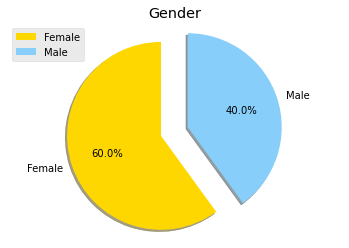

In [12]:
#  pie plot of Gender 

labels = ['Female', 'Male']
value = [882, 588]
colors = ['gold','lightskyblue']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Gender')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle  Plot of Gender with Attrition

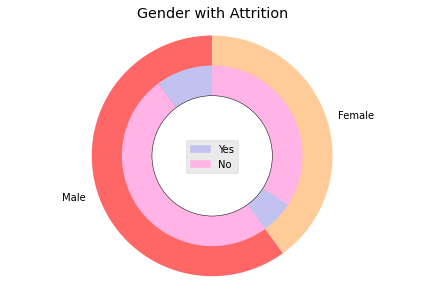

In [15]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.title('Gender with Attrition')
plt.show()

#### Count Plot of Gender with Attrition

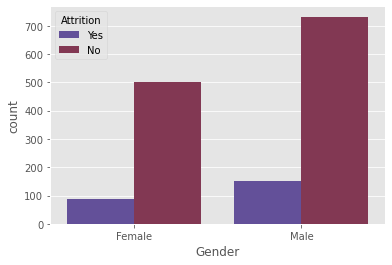

In [18]:
sns.countplot(df['Gender'],palette='twilight', hue='Attrition', data = df);b

#### Bar Plot of Gender with Attrition

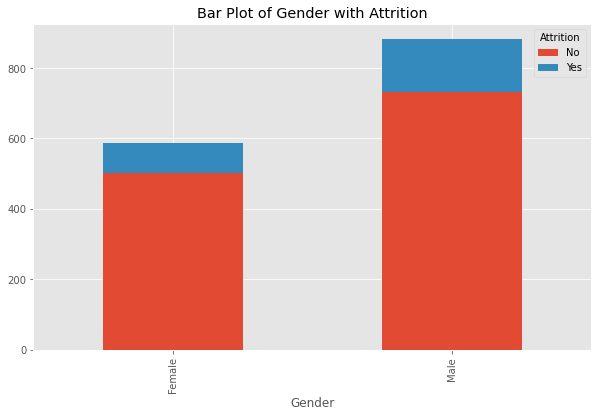

In [20]:
yac = df.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of Gender with Attrition')
plt.show()

##### From the above plots Male employees are more likely to leave the company than female employees.

# Analysis of Education

In [31]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

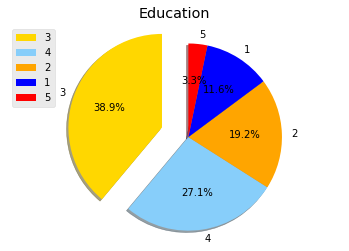

In [32]:
#  pie plot of Education 

labels = ['3', '4', '2', '1', '5']
value = [572, 398, 282, 170, 48]
colors = ['gold','lightskyblue', 'orange', 'blue', 'red']
explode = [0.3,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Education')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

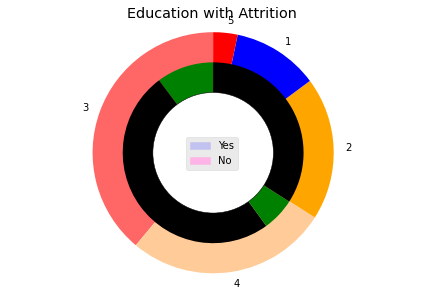

In [35]:
labels = ['3', '4', '2', '1', '5']
sizes = [572, 398, 282, 170, 48]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99', 'orange', 'blue', 'red']

colors_attrition = ['green','black', 'green','black']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.title('Education with Attrition')
plt.show()

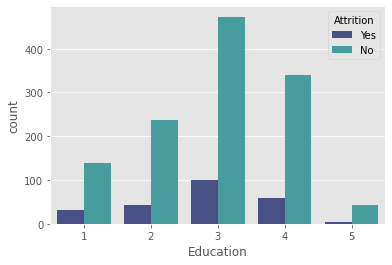

In [37]:
sns.countplot(df['Education'],palette='mako', hue='Attrition', data = df);

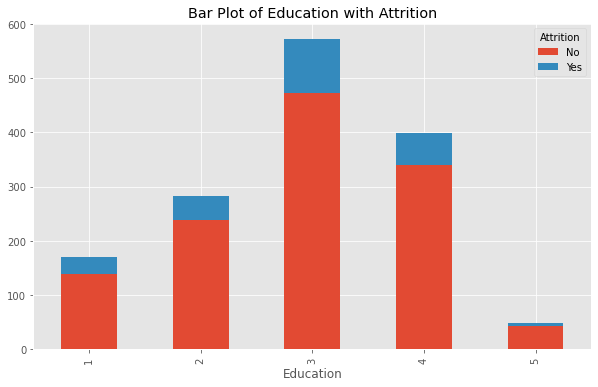

In [42]:
edy = df.groupby("Education")['Attrition'].value_counts(normalize=False).unstack()

edy.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of Education with Attrition')
plt.show()

### From the above  plots I can analyze five Education in the company.
###### Employees who are at 3 education level have the most attrition number which makes up the 38.9% of attrition rate in the company.
###### Employees who have the master, college, and below college degrees are follower of employees who have bachelor degrees in terms of the attrition number in the company respectively.

### EducationField

In [43]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

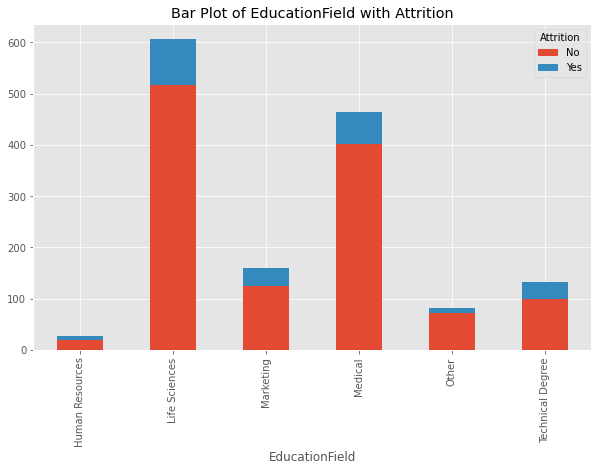

In [41]:
cay = df.groupby("EducationField")['Attrition'].value_counts(normalize=False).unstack()

cay.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of EducationField with Attrition')
plt.show()

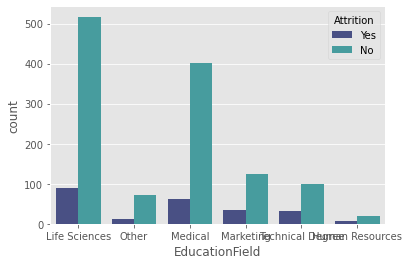

In [40]:
sns.countplot(df['EducationField'],palette='mako', hue='Attrition', data = df);

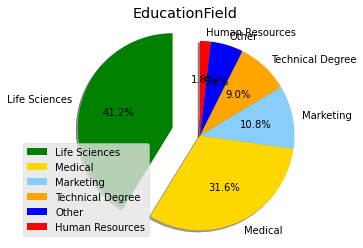

In [48]:
#  pie plot of EducationField 

labels = ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources']
value = [606, 464, 159, 132, 82, 27]
colors = ['green','gold','lightskyblue', 'orange', 'blue', 'red']
explode = [0.3,0,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('EducationField')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower left')
plt.show()

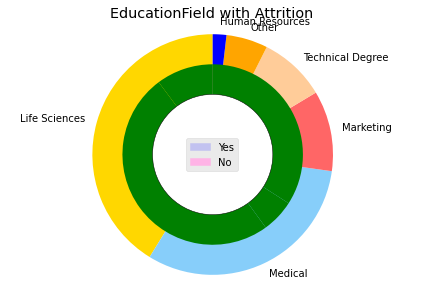

In [49]:
labels = ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources']
sizes = [606, 464, 159, 132, 82, 27]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['gold','lightskyblue', '#ff6666', '#ffcc99', 'orange', 'blue']

colors_attrition = ['green','green', 'green','green', 'green','green']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.title('EducationField with Attrition')
plt.show()

#### From the above Box & Pie plots I can analyze five EducationFeild in the company.¶
###### Employees who have Life Science education level have the most attrition number which makes up the 41.22% of attrition rate in the company.

# Analysis on Department

In [27]:
dpt = df[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [28]:
dpt['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

#### Pie Plot of Department with Attrition

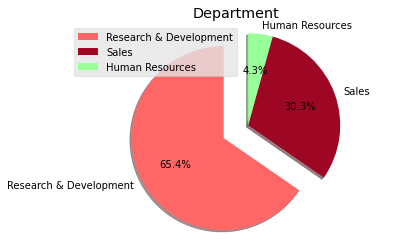

In [27]:
#  pie plot of Department 

labels = ['Research & Development', 'Sales', 'Human Resources']
value = [961, 446, 63]
colors = ['#ff6666','#9e0723', '#99ff99']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('Department')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle Plot of Department with Attrition

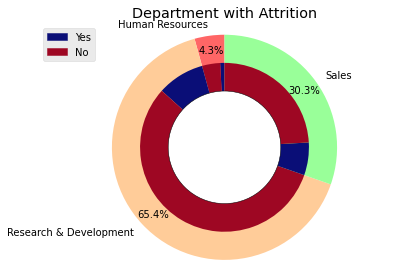

In [29]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('Department with Attrition')
plt.tight_layout()
plt.show()

#### Count Plot of Department with Attrition

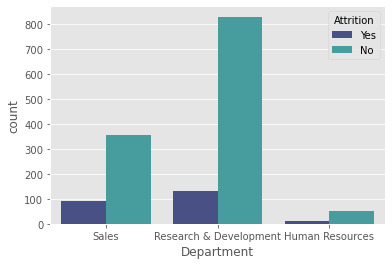

In [30]:
sns.countplot(df['Department'],palette='mako', hue='Attrition', data = df);

#### Bar Plot of Department with Attrition

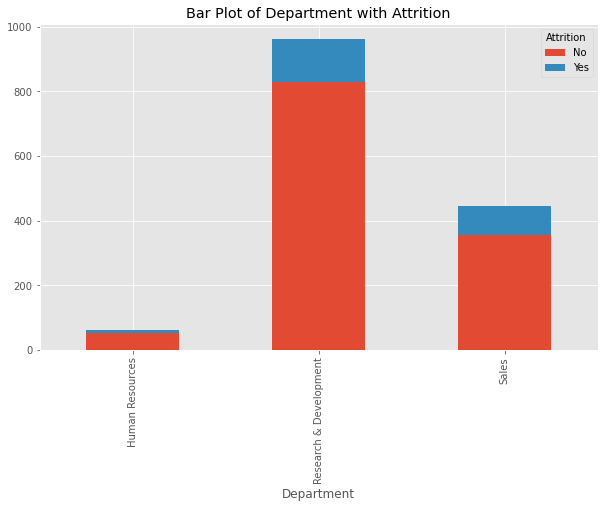

In [31]:
yac = df.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of Department with Attrition')
plt.show()

#### There are three departments in the company.(Research & Development,Sales,Human Resources)
#### From the above box and pie plot I can say that Research & Development Department has the most attrition rate(65.4%) in the company.

# Analysis of Marital Status

In [34]:
ms = df[['MaritalStatus','Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [35]:
ms['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

#### Pie Plot of MaritalStatus with Attrition

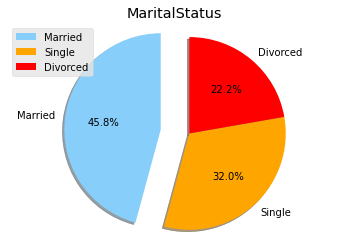

In [37]:
#  pie plot of MaritalStatus 

labels = ['Married', 'Single', 'Divorced']
value = [673, 470, 327]
colors = ['lightskyblue','orange', 'red']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('MaritalStatus')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

####  Circle Plot of MaritalStatus with Attrition

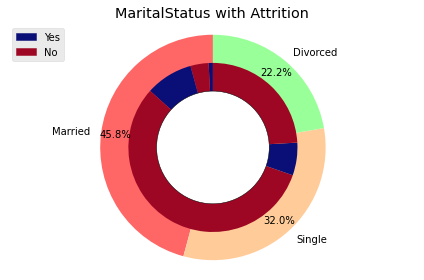

In [38]:
labels = ['Married', 'Single', 'Divorced',]
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('MaritalStatus with Attrition')
plt.tight_layout()
plt.show()

#### Count Plot of MaritalStatus with Attrition

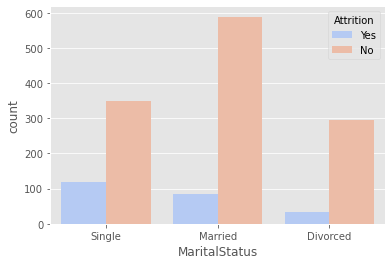

In [39]:
sns.countplot(df['MaritalStatus'],palette='coolwarm', hue='Attrition', data = df);

#### Bar Plot of MaritalStatus with Attrition

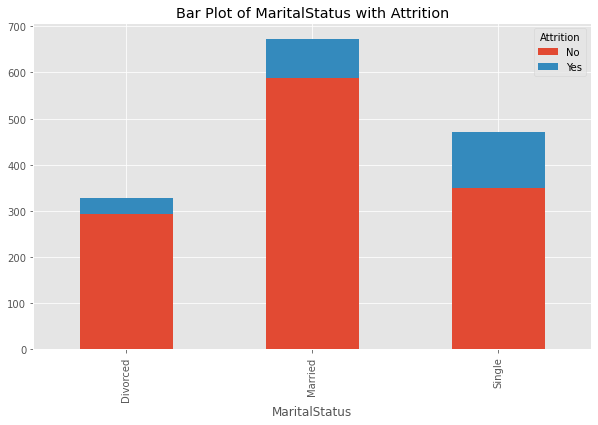

In [40]:
yac = df.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of MaritalStatus with Attrition')
plt.show()

### Married employees are more likely to leave the company.
##### Single and Divorced employees are the followers of Single employees in the attrition number of the company respectively.

# Analysis of Job Satisfaction

In [64]:
js = df[['JobSatisfaction','Attrition']]
js.head()

,JobSatisfaction,Attrition
0,4,Yes
1,2,No
2,3,Yes
3,3,No
4,2,No


In [65]:
js['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

#### Pie Plot of JobSatisfaction with Attrition

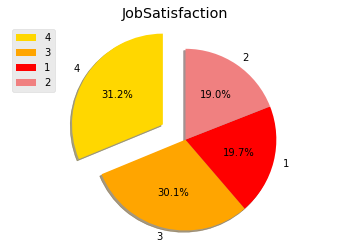

In [66]:
#  pie plot of JobSatisfaction 

labels = ['4', '3', '1', '2']
value = [459, 442, 289, 280]
colors = ['gold', 'orange', 'red', 'lightcoral']
explode = [0.3,0,0,0]# 

plt.style.use('ggplot')
plt.title('JobSatisfaction')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle Plot of JobSatisfaction with Attrition

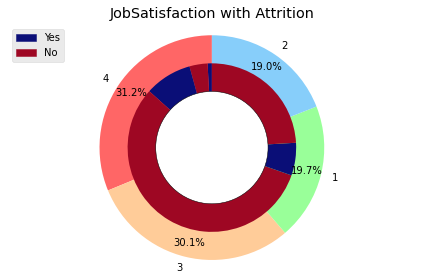

In [67]:
labels = ['4', '3', '1', '2']
sizes = [459, 442, 289, 280]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99', 'lightskyblue']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('JobSatisfaction with Attrition')
plt.tight_layout()
plt.show()

#### Count Plot of JobSatisfaction with Attrition

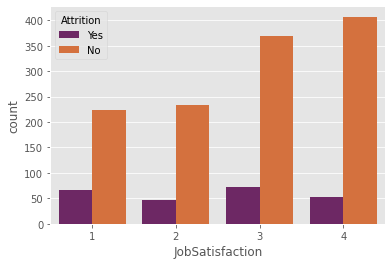

In [69]:
sns.countplot(df['JobSatisfaction'],palette='inferno', hue='Attrition', data = df);

#### Bar Plot of JobSatisfaction with Attrition

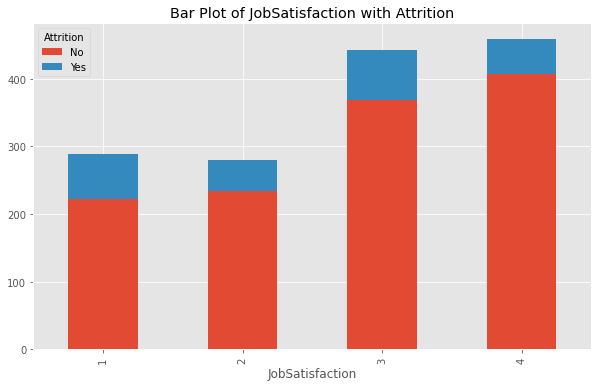

In [70]:
yac = df.groupby("JobSatisfaction")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of JobSatisfaction with Attrition')
plt.show()

#### 4 - High Job Satisfaction
#### 2 - Low Job Satisfaction
#### In high job satisfaction, surprisingly employees leave the company most and their attrition composes 31.22% of company's attrition. From this picture, I assume that job satisfaction should not be the main reason for employees to leave the company.
#### As it may be expected, in low job satisfaction, employees leave the company more than other groups except high satisfaction.

# Analysis of EnvironmentSatisfaction

In [71]:
es = df[['EnvironmentSatisfaction','Attrition']]
es.head()

,EnvironmentSatisfaction,Attrition
0,2,Yes
1,3,No
2,4,Yes
3,4,No
4,1,No


In [73]:
es['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

#### Pie Plot of EnvironmentSatisfaction with Attrition

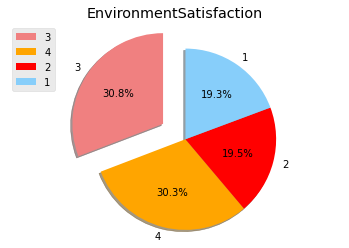

In [75]:
#  pie plot of EnvironmentSatisfaction 

labels = ['3', '4', '2', '1']
value = [453, 446, 287, 284]
colors = ['lightcoral', 'orange', 'red', 'lightskyblue']
explode = [0.3,0,0,0] 

plt.style.use('ggplot')
plt.title('EnvironmentSatisfaction')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle Plot of EnvironmentSatisfaction with Attrition

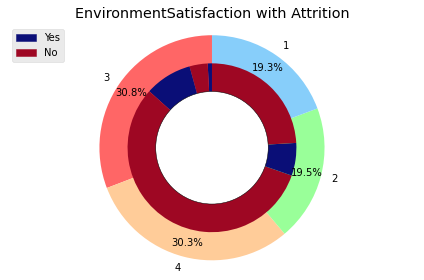

In [78]:
labels = ['3', '4', '2', '1']
sizes = [453, 446, 287, 284]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99', 'lightskyblue']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('EnvironmentSatisfaction with Attrition')
plt.tight_layout()
plt.show()

#### Count Plot of EnvironmentSatisfaction with Attrition

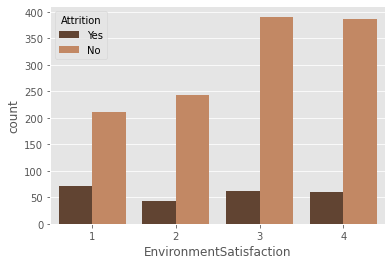

In [80]:
sns.countplot(df['EnvironmentSatisfaction'],palette='copper', hue='Attrition', data = df);

#### Bar Plot of EnvironmentSatisfaction with Attrition

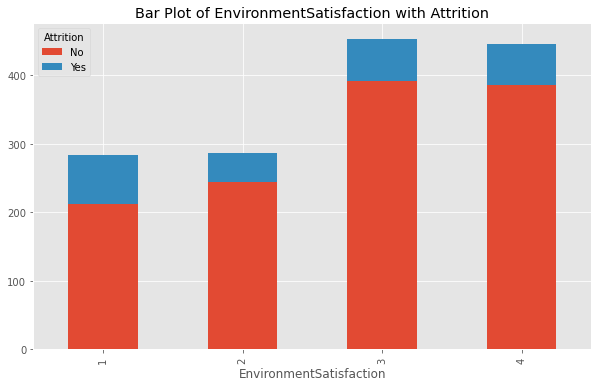

In [81]:
acy = df.groupby("EnvironmentSatisfaction")['Attrition'].value_counts(normalize=False).unstack()

acy.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of EnvironmentSatisfaction with Attrition')
plt.show()

#### 1 - Low
#### 2 - Medium
#### 3 - High
#### 4 - Very High
#### As it may be expected, there is a high attrition rate(30.82%) in the low satisfaction environment.
#### This result might tell us that environment satisfaction is not the one of the main reasons for attrition in the company.

## Analysis of RelationshipSatisfaction

In [82]:
rs = df[['RelationshipSatisfaction','Attrition']]
rs.head()

,RelationshipSatisfaction,Attrition
0,1,Yes
1,4,No
2,2,Yes
3,3,No
4,4,No


In [83]:
rs['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

#### Pie Plot of RelationshipSatisfaction with Attrition

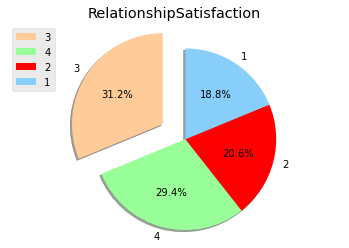

In [85]:
#  pie plot of RelationshipSatisfaction 

labels = ['3', '4', '2', '1']
value = [459, 432, 303, 276]
colors = ['#ffcc99', '#99ff99', 'red', 'lightskyblue']
explode = [0.3,0,0,0] 

plt.style.use('ggplot')
plt.title('RelationshipSatisfaction')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle Plot RelationshipSatisfaction with Attrition

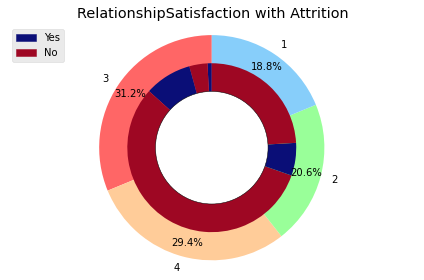

In [86]:
labels = ['3', '4', '2', '1']
sizes = [459, 432, 303, 276]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99', 'lightskyblue']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('RelationshipSatisfaction with Attrition')
plt.tight_layout()
plt.show()

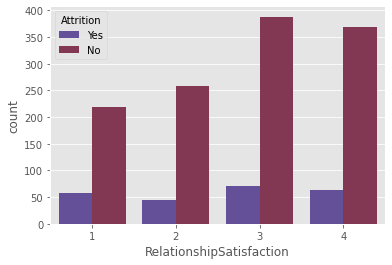

In [88]:
sns.countplot(df['RelationshipSatisfaction'],palette='twilight', hue='Attrition', data = df);

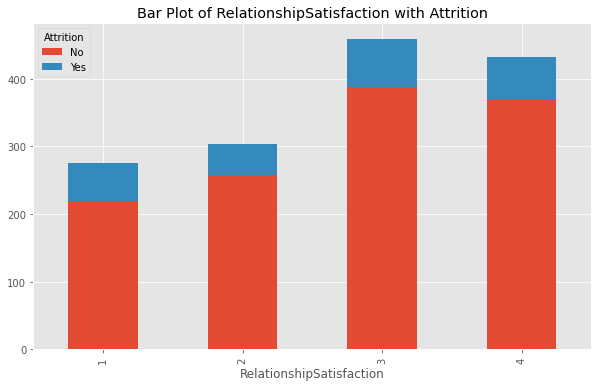

In [89]:
rsy = df.groupby("RelationshipSatisfaction")['Attrition'].value_counts(normalize=False).unstack()

rsy.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of RelationshipSatisfaction with Attrition')
plt.show()

##### Relationship satisfaction is aligned with high and very high in the company. But, still High and very high relationship satisfaction level have the most attrition number respectively and compose of 31.2% all attrition in the company.

# Analysis of JobInvolvement

In [90]:
Ji = df[['JobInvolvement','Attrition']]
Ji.head()

,JobInvolvement,Attrition
0,3,Yes
1,2,No
2,2,Yes
3,3,No
4,3,No


In [91]:
Ji['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

#### Pie Plot of JobInvolvement with Attrition

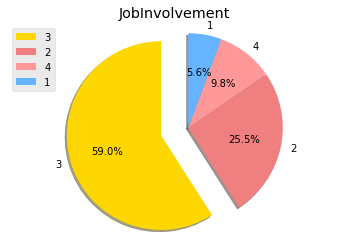

In [92]:
#  pie plot of JobInvolvement 

labels = ['3', '2', '4', '1']
value = [868, 375, 144, 83]
colors = ['gold','lightcoral','#ff9999','#66b3ff']
explode = [0.3,0,0,0] 

plt.style.use('ggplot')
plt.title('JobInvolvement')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle Plot JobInvolvement with Attrition

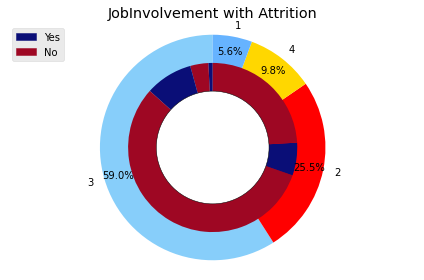

In [96]:
labels = ['3', '2', '4', '1']
sizes = [868, 375, 144, 83]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['lightskyblue','red','gold','#66b3ff']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('JobInvolvement with Attrition')
plt.tight_layout()
plt.show()

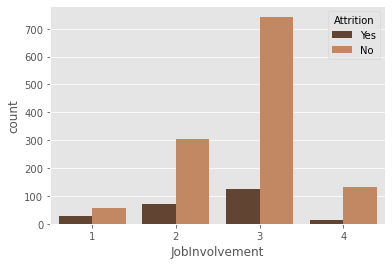

In [98]:
sns.countplot(df['JobInvolvement'],palette='copper', hue='Attrition', data = df);

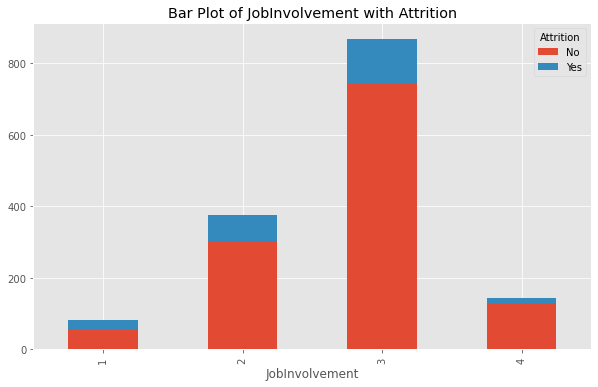

In [99]:
rsy = df.groupby("JobInvolvement")['Attrition'].value_counts(normalize=False).unstack()

rsy.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of JobInvolvement with Attrition')
plt.show()

#### 1 - Low
#### 2 - Medium
#### 3- High
#### 4 - Very High
#### High job involvement category has the highest employee leaving proportion within individual category when it is compared to the other categories with 59.0% attrition Rate.

# Analysis of WorkLifeBalance

In [100]:
wlb = df[['WorkLifeBalance','Attrition']]
wlb.head()

,WorkLifeBalance,Attrition
0,1,Yes
1,3,No
2,3,Yes
3,3,No
4,3,No


In [101]:
wlb['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

#### Pie Plot of WorkLifeBalance with Attrition

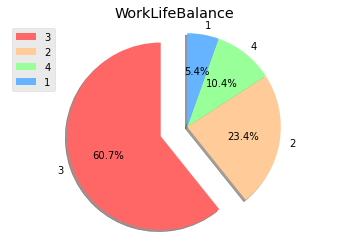

In [102]:
#  pie plot of WorkLifeBalance 

labels = ['3', '2', '4', '1']
value = [893, 344, 153, 80]
colors = ['#ff6666', '#ffcc99', '#99ff99','#66b3ff']
explode = [0.3,0,0,0] 

plt.style.use('ggplot')
plt.title('WorkLifeBalance')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle Plot of WorkLifeBalance with Attrition

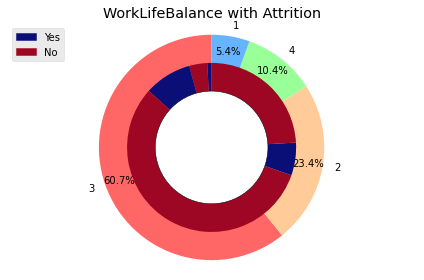

In [104]:
labels = ['3', '2', '4', '1']
sizes = [893, 344, 153, 80]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99','#66b3ff']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('WorkLifeBalance with Attrition')
plt.tight_layout()
plt.show()

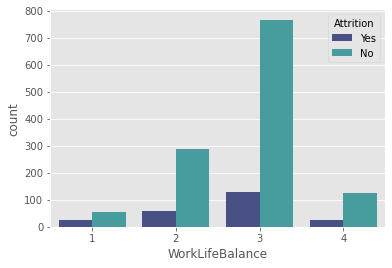

In [105]:
sns.countplot(df['WorkLifeBalance'],palette='mako', hue='Attrition', data = df);

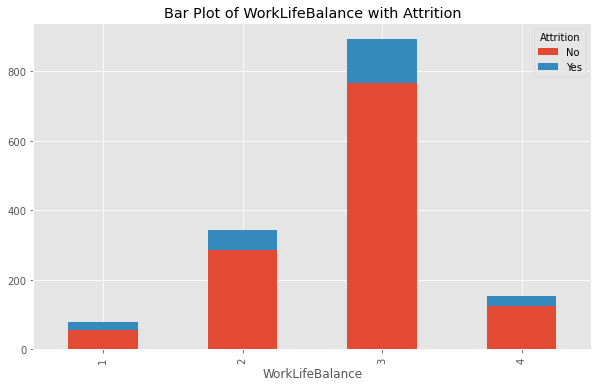

In [106]:
rsy = df.groupby("WorkLifeBalance")['Attrition'].value_counts(normalize=False).unstack()

rsy.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of WorkLifeBalance with Attrition')
plt.show()

#### In general, work life balance is satisfactorily good throughout the company. But we have the highest attrition number and percentage throughout the company.

#### Besides, bad work life balance group has highest attrition percentage in its individual group.

# Analysis of PerformanceRating

In [107]:
Pr = df[['PerformanceRating','Attrition']]
wlb.head()

,WorkLifeBalance,Attrition
0,1,Yes
1,3,No
2,3,Yes
3,3,No
4,3,No


In [108]:
Pr['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

#### Pie Plot of PerformanceRating with Attrition

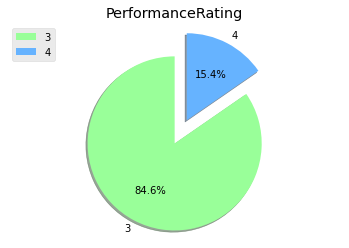

In [109]:
#  pie plot of PerformanceRating 

labels = ['3', '4']
value = [1244, 226]
colors = ['#99ff99','#66b3ff']
explode = [0.3,0] 

plt.style.use('ggplot')
plt.title('PerformanceRating')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

### Circle Plot of PerformanceRating with Attrition

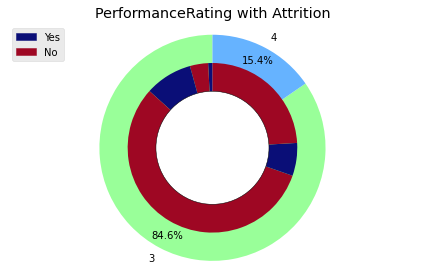

In [110]:
labels = ['3', '4']
sizes = [1244, 226]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#99ff99','#66b3ff']

colors_attrition = ['#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('PerformanceRating with Attrition')
plt.tight_layout()
plt.show()

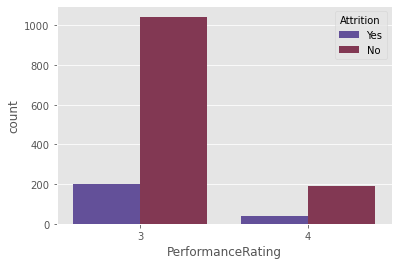

In [111]:
sns.countplot(df['PerformanceRating'],palette='twilight', hue='Attrition', data = df);

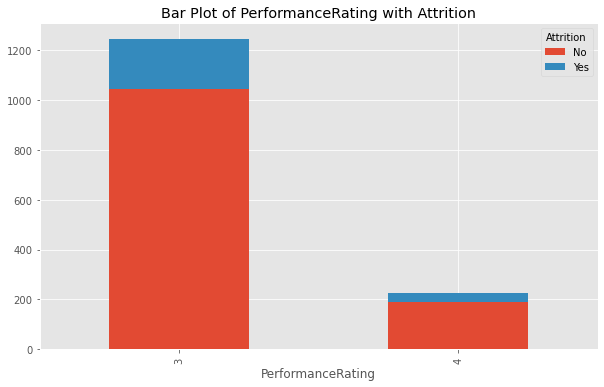

In [112]:
rsy = df.groupby("PerformanceRating")['Attrition'].value_counts(normalize=False).unstack()

rsy.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of PerformanceRating with Attrition')
plt.show()

#### Performance rating has two category such as 3 and 4. 84.6% of employees are in the performance rating 3 group and 16.08 attrition. 

## Analysis of Work Experience
#### 1.YearsAtCompany
#### 2.YearsInCurrentRole
#### 3.YearsSinceLastPromotion
#### 4.YearsWithCurrManager
#### 5.TotalWorkingYears

In [114]:
we = df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


### Bar Plot Of Work Experience

#### YearsAtCompany

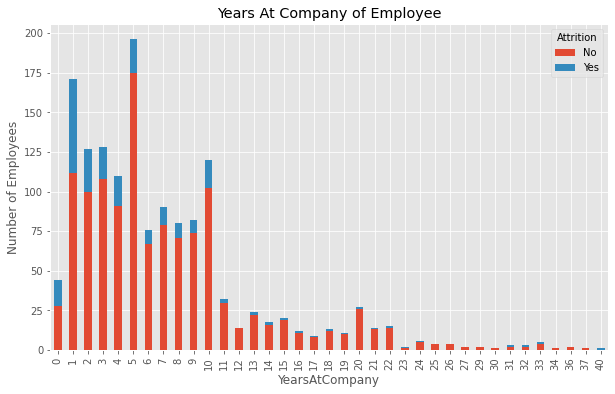

In [115]:
yac = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

#### YearsInCurrentRole and YearsSinceLastPromotion

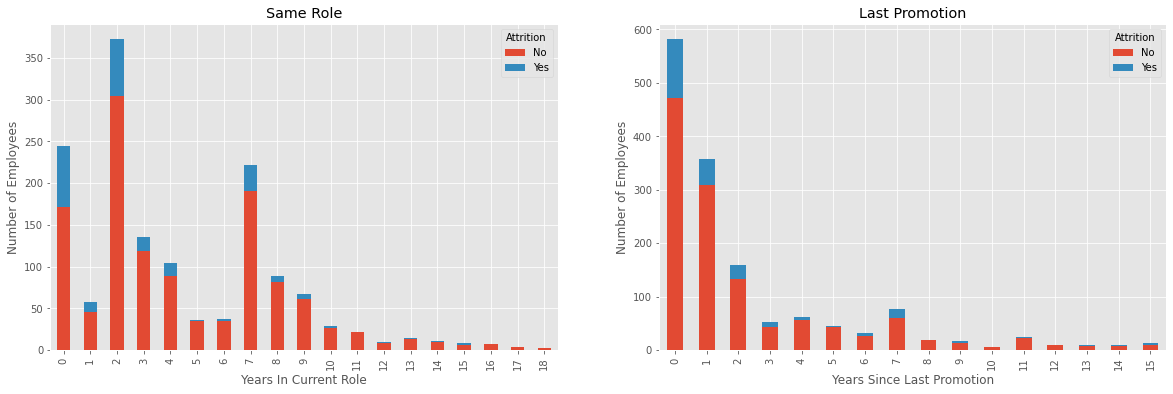

In [116]:
ycr = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

#### YearsWithCurrManager

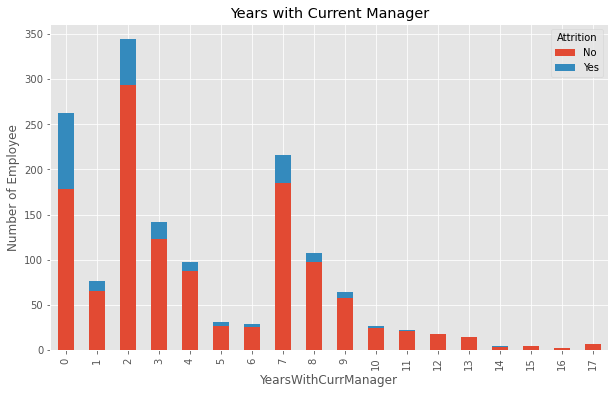

In [117]:
ycm = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

#### TotalWorkingYears

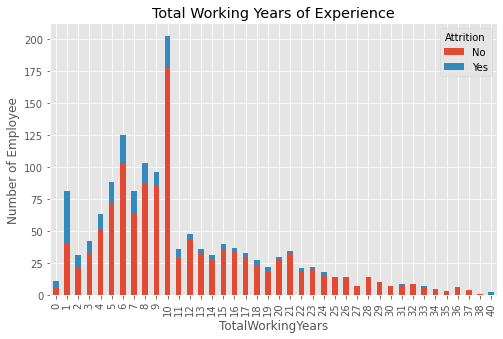

In [118]:
twy = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

##### It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start

# Analysis of Monthly Income

In [119]:
mi = df[df['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = df[df['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


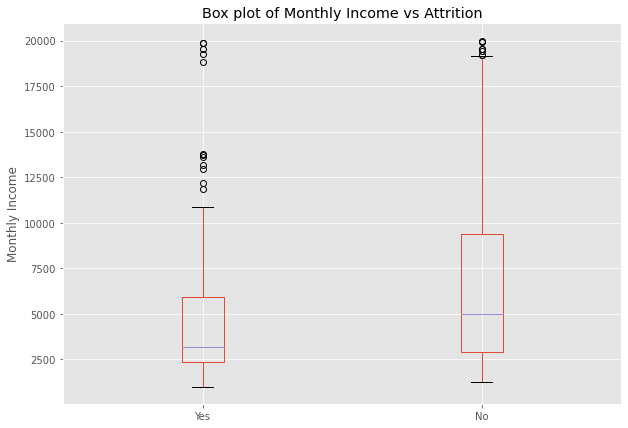

In [120]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

##### Employees who left their jobs tend to have low average monthly income than those who continued their job in the company

# Over Time Employee Analysis

#### Histogram Plot of Over Time Employee Analysis

In [126]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:ylabel='Frequency'>

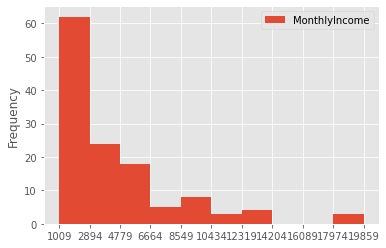

In [124]:
# Analysis of Over Time Employee with MonthlyIncome & Attrition

dot = df[['OverTime', 'MonthlyIncome', 'Attrition']]
oyay = dot[(df['OverTime']=='Yes') & (df['Attrition']=='Yes')]
oyay = oyay.sort_values(by = 'MonthlyIncome', ascending=False, axis=0) #sorting to get the top values
count, bin_edges = np.histogram(oyay['MonthlyIncome'])

oyay.plot(kind='hist', xticks=bin_edges)

#### Pie Plot of OverTime with Attrition

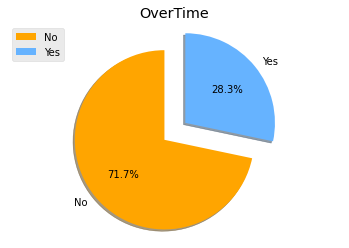

In [127]:
#  pie plot of OverTime 

labels = ['No', 'Yes']
value = [1054, 416]
colors = ['orange','#66b3ff']
explode = [0.3,0] 

plt.style.use('ggplot')
plt.title('OverTime')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Circle Plot of OverTime with Attrition

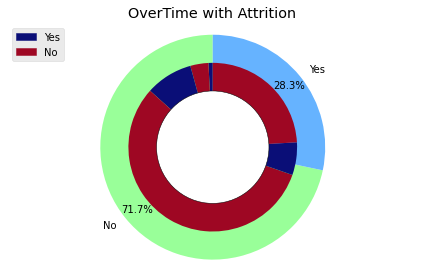

In [128]:
labels = ['No', 'Yes']
sizes = [1054, 416]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#99ff99','#66b3ff']

colors_attrition = ['#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.title('OverTime with Attrition')
plt.tight_layout()
plt.show()

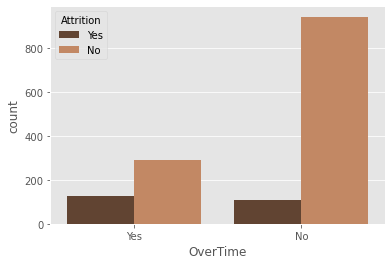

In [129]:
sns.countplot(df['OverTime'],palette='copper', hue='Attrition', data = df);

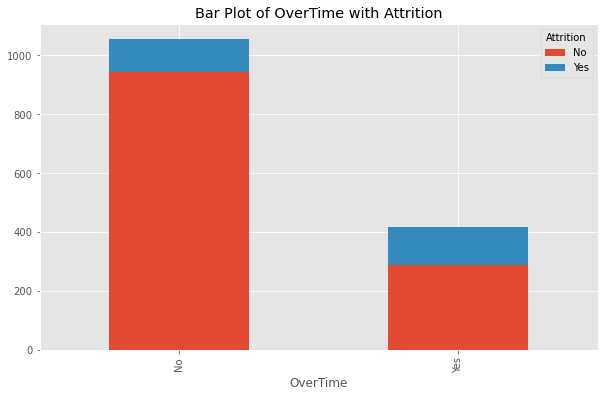

In [130]:
roy = df.groupby("OverTime")['Attrition'].value_counts(normalize=False).unstack()

roy.plot(kind='bar', stacked='False',figsize=(10,6))
plt.title('Bar Plot of OverTime with Attrition')
plt.show()

#### 28.3% of employees have the over time work in the company and they have higher attrition number than employees who don't have. There is not a significant difference between these two groups' attrition number. But if you compare individually both groups, over time employees are much more likely to leave the company.

In [30]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int

In [50]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [51]:
# pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# Label Encoder

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [52]:
le = LabelEncoder()
df.Attrition = le.fit_transform(df.Attrition)
df.BusinessTravel = le.fit_transform(df.BusinessTravel)
df.Department = le.fit_transform(df.Department)
df.EducationField = le.fit_transform(df.EducationField)
df.Gender = le.fit_transform(df.Gender)
df.JobRole = le.fit_transform(df.JobRole)
df.MaritalStatus = le.fit_transform(df.MaritalStatus)
df.OverTime = le.fit_transform(df.OverTime)

In [53]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,3,1,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,4,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,3,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,3,4,6,3,3,2,2,2,2


In [54]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.0,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.0,2.0,3.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0


#### From the Above statistics data show that their multiple outliers mostly in many columns.
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### a) Also, number of rows in each column are not same, means there is no null values present in the data set.
#### b) Also, the mean and 50%value of most of the column are same and the STD and mean have a major difference to each other.
#### c) Most of the column statistics data are near to 0 values.
#### d) By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

# Replacing all the zero values from different columns

In [56]:
# Replacing continous columns with mean
df['TotalWorkingYears'] = df['TotalWorkingYears'].replace(0,df['TotalWorkingYears'].mean())
df['YearsAtCompany'] = df['YearsAtCompany'].replace(0,df['YearsAtCompany'].mean())
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].replace(0,df['YearsInCurrentRole'].mean())
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].replace(0,df['YearsSinceLastPromotion'].mean())
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].replace(0,df['YearsWithCurrManager'].mean())

###### After understanding the Describe I got that in this dataset there are zero values which I have replace with mean because all the zero value column are continuous in nature.

# Histogram Plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
#### THe following are some of the characteristics of histograms:
#### a)provides us a count of the number of observations in each bin created for visualization.¶
#### b)From the shape of the bin, I can easily observe the distribution i.e. Attrition it is Gaussian, skewed or exponential.
#### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>],
       [<AxesSubplo

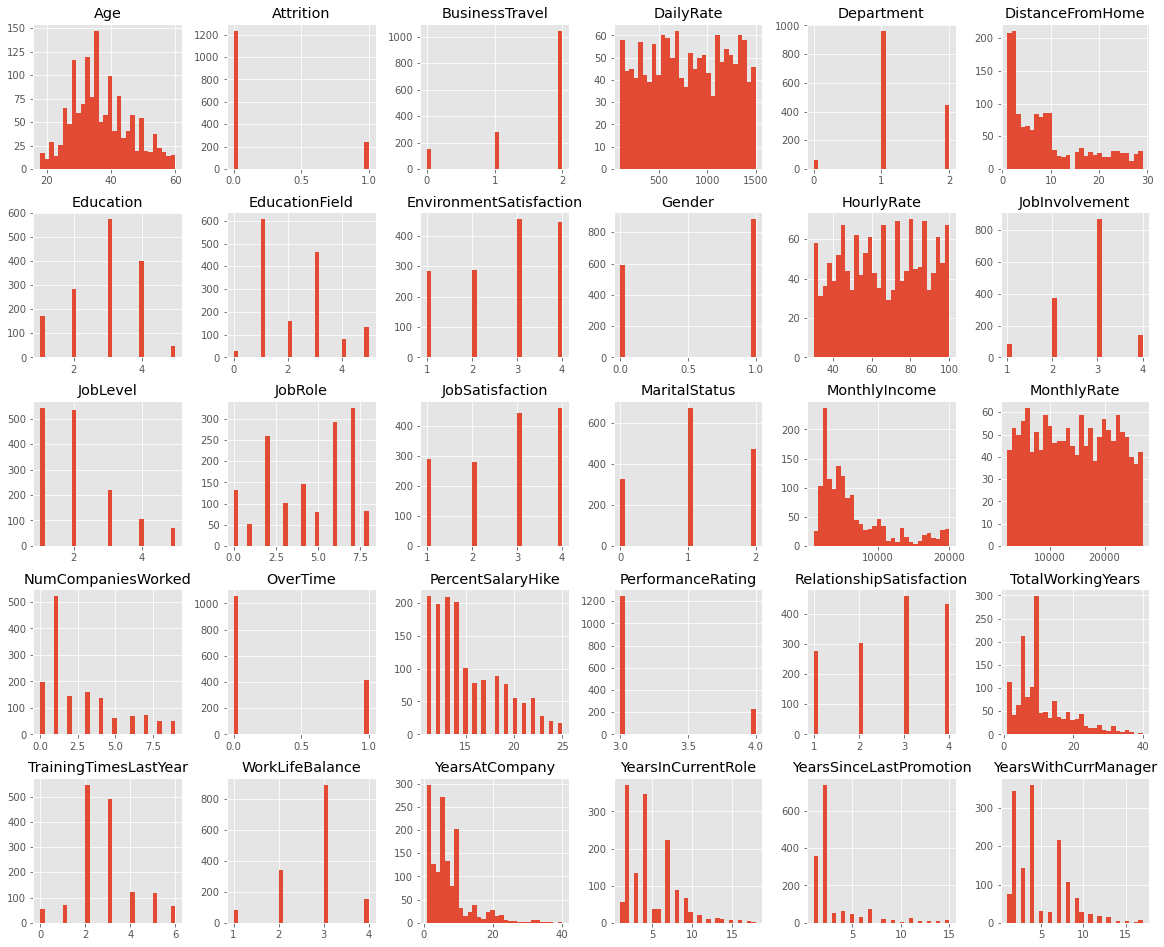

In [58]:
df.hist(figsize=(20,20),grid=True,layout=(6,6),bins=30)

### By making Histogram Plot I can see there are some skewness in this dataset.
### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

# Distribution Plot

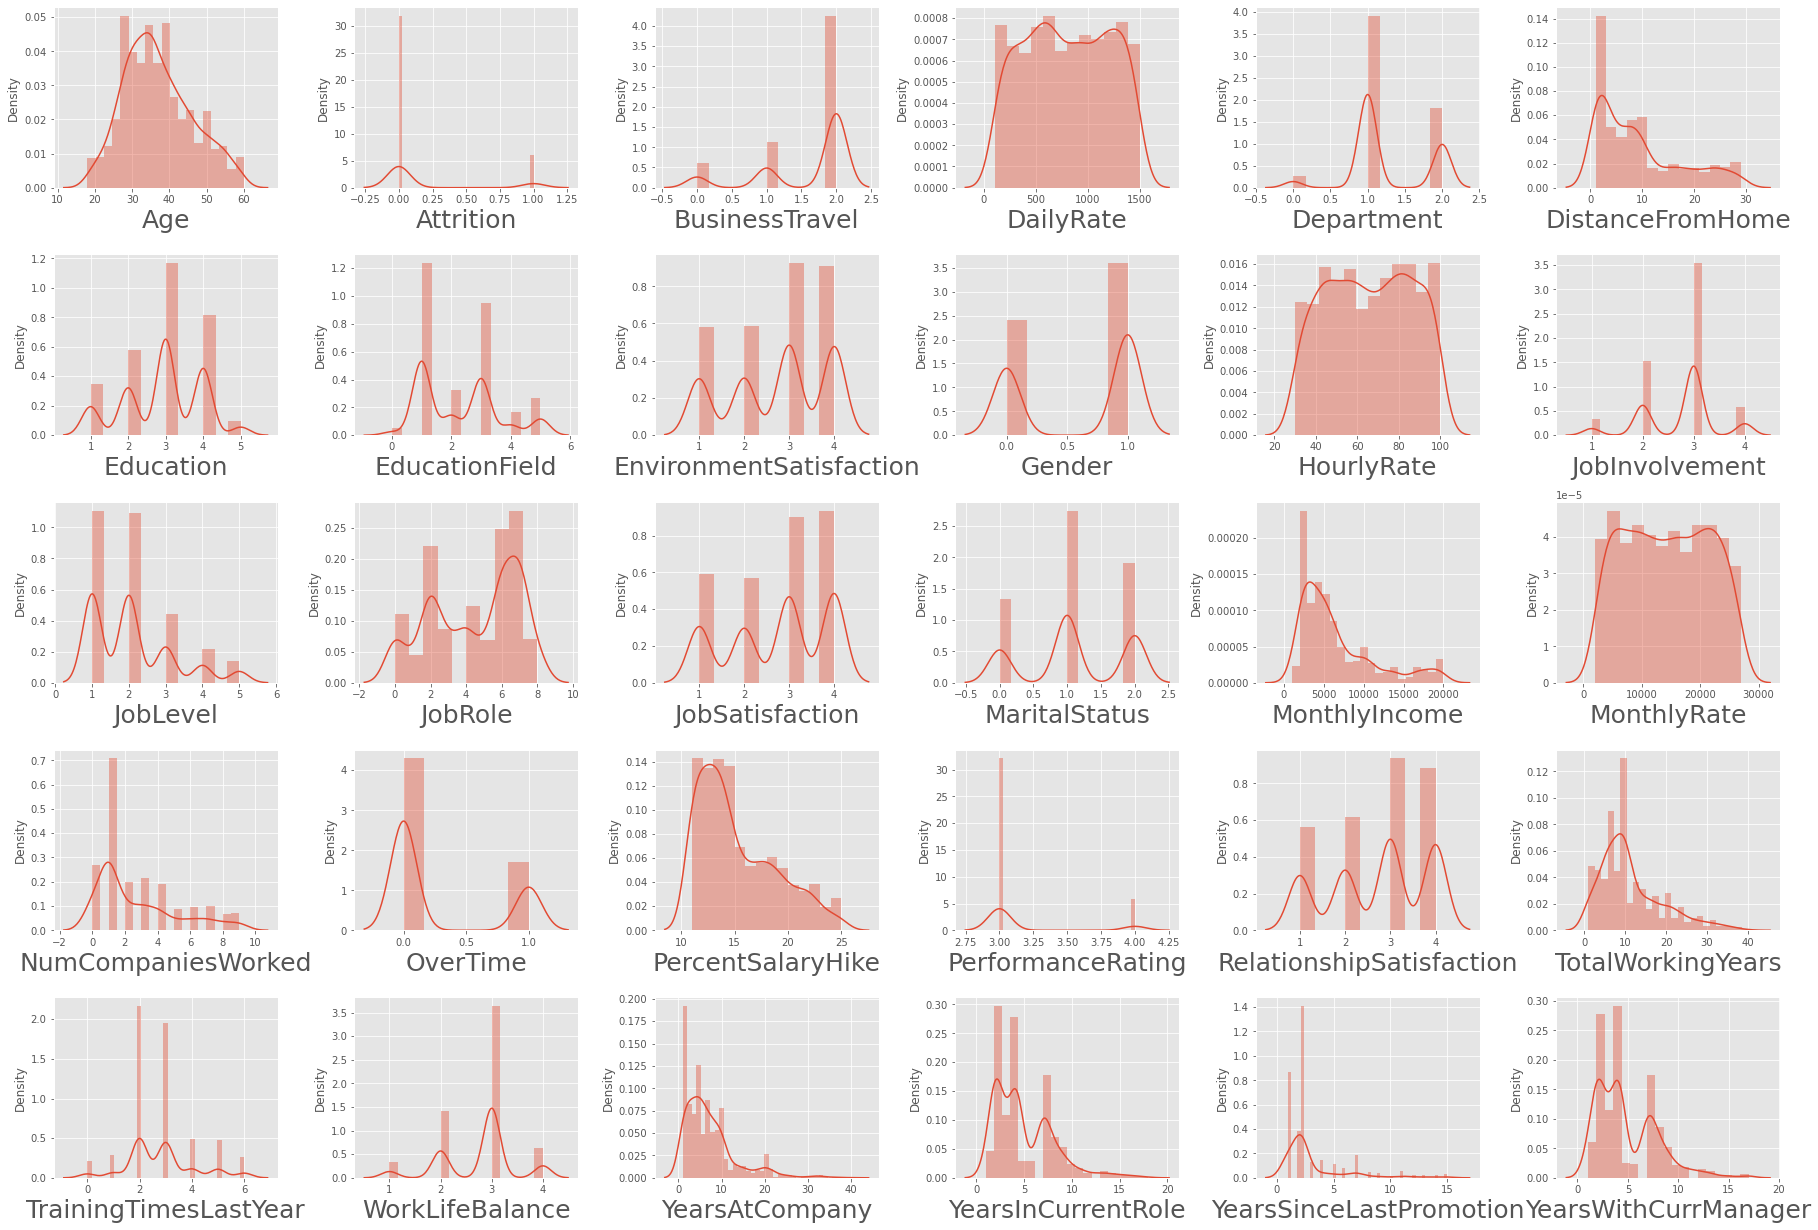

In [60]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=35:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### From the above Distribution Plot I can see that there are skewness in this dataset.

# Box Plot

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.523571,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.656429,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.789286,0.642714;0.110714x0.107857)
JobLevel                       AxesSubplot(0.125,0.513286;0.110714x0.107857)

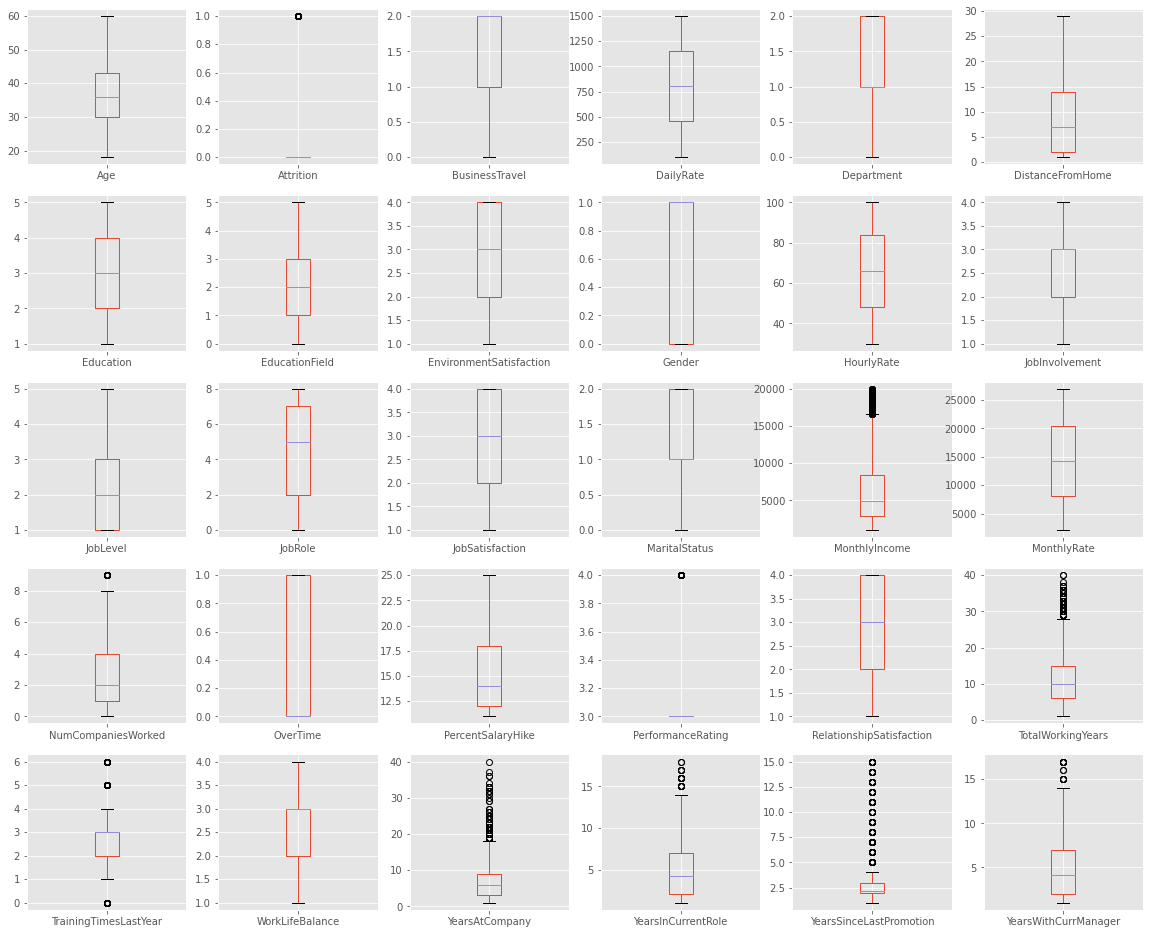

In [61]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))

#### From above image I can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
#### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.

# Removing Outliers

# Z Score

In [62]:
z_score = zscore(df[['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]

In [63]:
df.shape

(1383, 30)

### After using zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.
### So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
### After, removing the outlier’s final there are 1383 and 30 column presents in the data set.

# Creating Distribution Plot after removing Skewness & Outliers

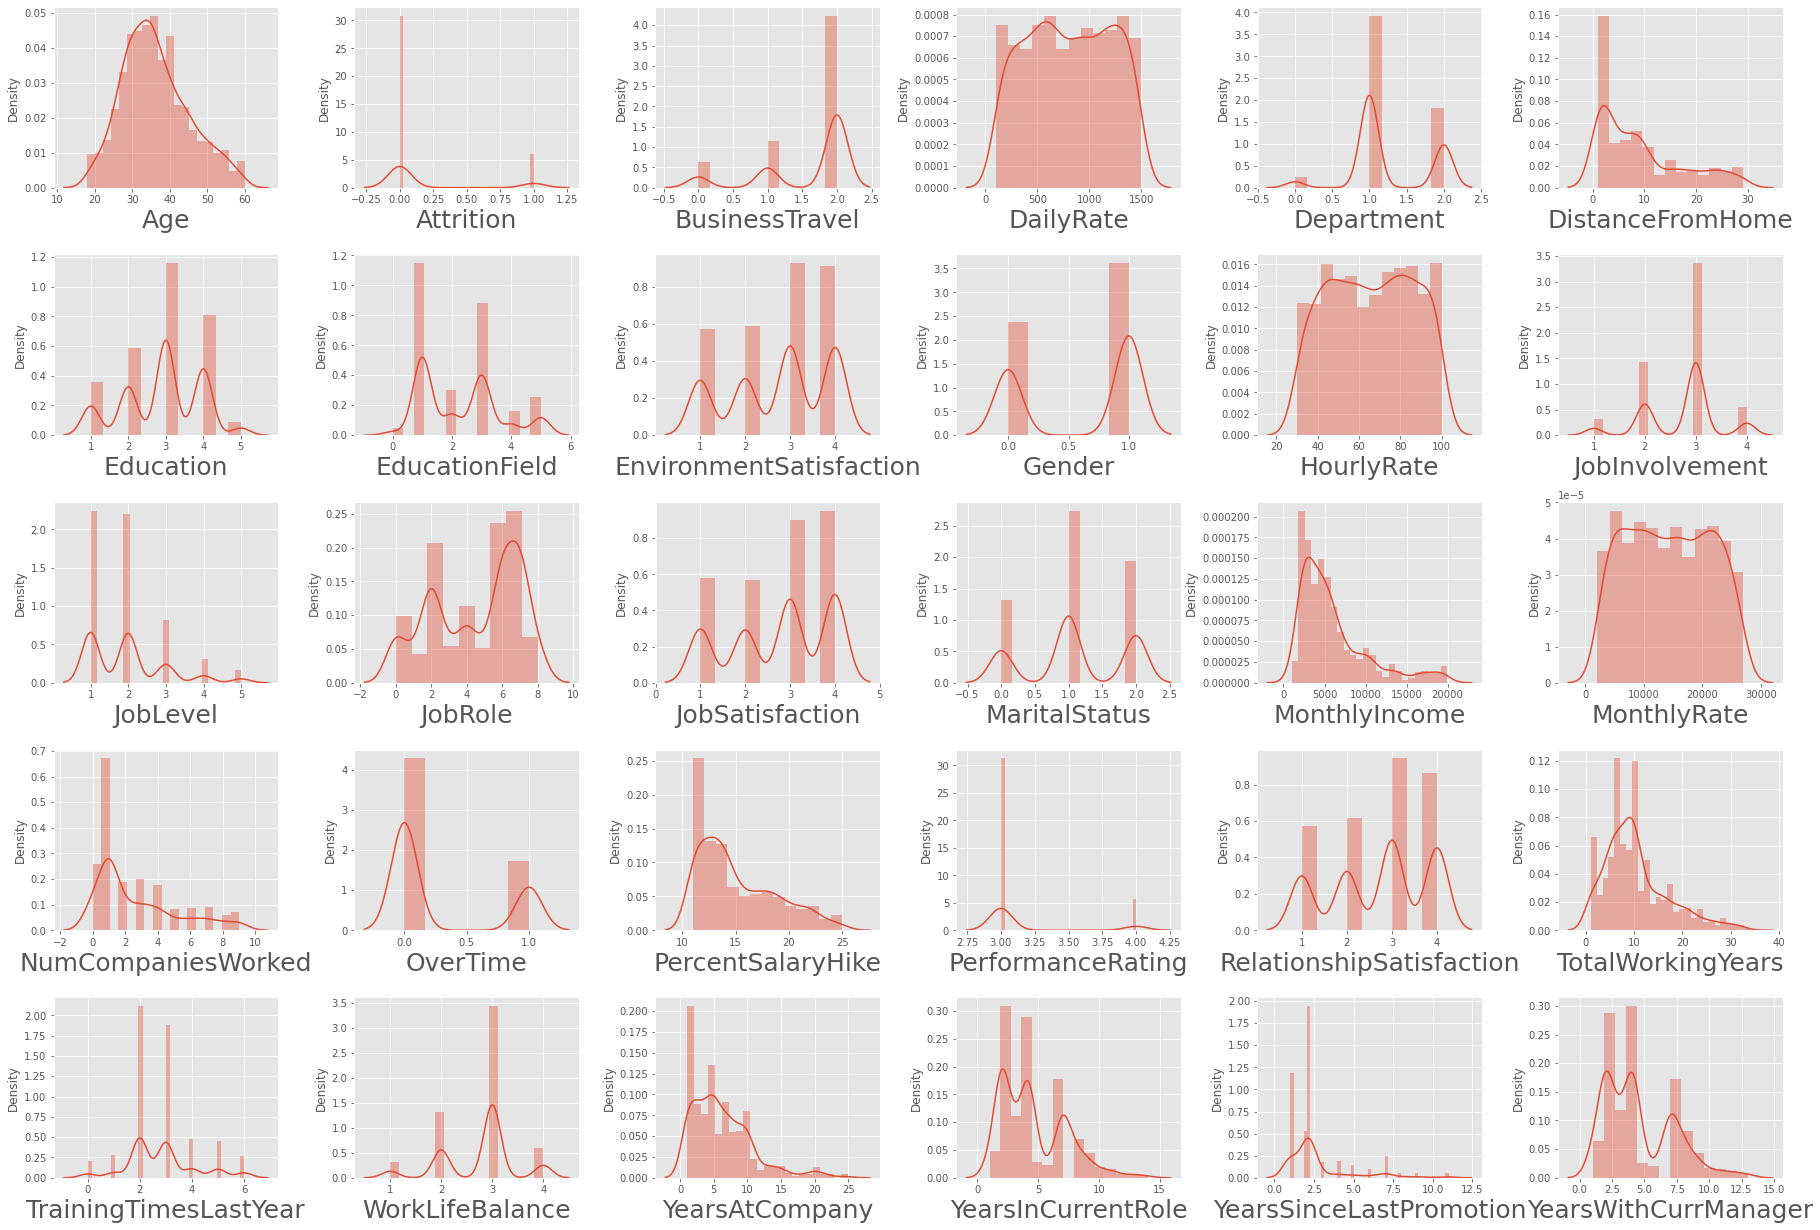

In [64]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=35:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### Hence After Rmoving Outliers I make distribution plot which shows few outliers are removed.

# Visualize the correlation

In [65]:
# find correlation of features vs target using corrwith

df.drop('Attrition',axis=1).corrwith(df.Attrition)

Age                        -0.158936
BusinessTravel             -0.000278
DailyRate                  -0.057222
Department                  0.063691
DistanceFromHome            0.081551
Education                  -0.031700
EducationField              0.022887
EnvironmentSatisfaction    -0.113803
Gender                      0.036051
HourlyRate                 -0.001524
JobInvolvement             -0.133731
JobLevel                   -0.170783
JobRole                     0.063946
JobSatisfaction            -0.114631
MaritalStatus               0.160828
MonthlyIncome              -0.160641
MonthlyRate                 0.015922
NumCompaniesWorked          0.050720
OverTime                    0.256646
PercentSalaryHike          -0.007328
PerformanceRating           0.010241
RelationshipSatisfaction   -0.051836
TotalWorkingYears          -0.175603
TrainingTimesLastYear      -0.058135
WorkLifeBalance            -0.062567
YearsAtCompany             -0.143251
YearsInCurrentRole         -0.102731
Y

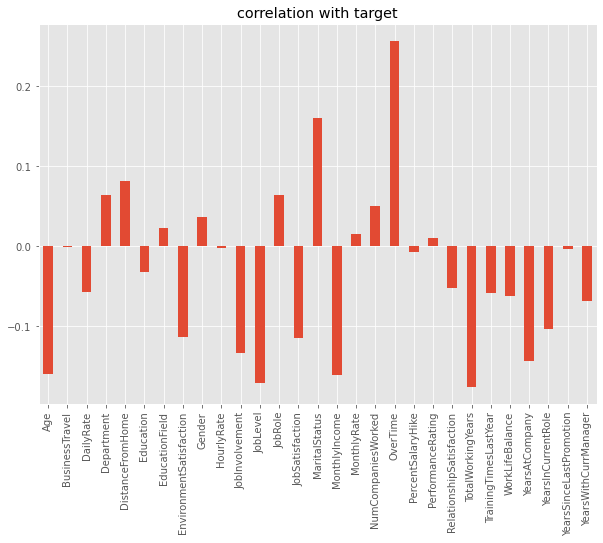

In [66]:
df.drop('Attrition',axis=1).corrwith(df.Attrition).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.¶
#### Most of the features are in minus value only 12 columns are positively related to target value.

# Correlation

##### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.¶
Denoted by r, it takes values between -1 and +1.

In [67]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.158936,0.021634,0.022105,-0.038270,-0.010264,0.198753,-0.032398,0.015606,-0.038752,...,0.006767,-0.000096,0.041699,0.616393,-0.018264,-0.016676,0.153125,0.105864,0.085235,0.109819
Attrition,-0.158936,1.000000,-0.000278,-0.057222,0.063691,0.081551,-0.031700,0.022887,-0.113803,0.036051,...,-0.007328,0.010241,-0.051836,-0.175603,-0.058135,-0.062567,-0.143251,-0.102731,-0.003572,-0.068580
BusinessTravel,0.021634,-0.000278,1.000000,-0.004738,-0.003490,-0.032462,-0.012022,0.023585,0.002724,-0.025059,...,-0.021639,-0.017559,-0.030618,0.013500,0.011403,-0.014124,-0.045688,-0.026211,-0.021132,-0.063716
DailyRate,0.022105,-0.057222,-0.004738,1.000000,-0.007326,-0.008067,-0.019609,0.040894,0.031593,-0.003194,...,0.027219,0.000664,0.001762,0.042284,0.006002,-0.045706,-0.008257,0.010530,-0.035961,-0.038152
Department,-0.038270,0.063691,-0.003490,-0.007326,1.000000,0.024801,0.012599,0.013940,-0.016215,-0.029305,...,-0.023439,-0.039438,-0.038758,-0.013844,0.036110,0.026530,0.045426,0.074976,0.066273,0.046229
DistanceFromHome,-0.010264,0.081551,-0.032462,-0.008067,0.024801,1.000000,0.000253,0.005587,-0.020118,-0.002079,...,0.035725,0.023378,0.007066,-0.000789,-0.034927,-0.035101,0.010877,0.011377,0.004030,0.008407
Education,0.198753,-0.031700,-0.012022,-0.019609,0.012599,0.000253,1.000000,-0.035966,-0.025295,-0.019452,...,-0.009255,-0.022511,-0.005103,0.117670,-0.025440,0.007156,0.026041,0.041505,0.058658,0.026003
EducationField,-0.032398,0.022887,0.023585,0.040894,0.013940,0.005587,-0.035966,1.000000,0.047346,0.011467,...,-0.009427,-0.004323,-0.013703,-0.011806,0.049563,0.033680,-0.006164,-0.032542,0.034558,-0.005189
EnvironmentSatisfaction,0.015606,-0.113803,0.002724,0.031593,-0.016215,-0.020118,-0.025295,0.047346,1.000000,-0.015634,...,-0.029413,-0.026458,0.018427,0.006038,-0.020982,0.031822,0.017032,0.052830,0.012742,0.010219
Gender,-0.038752,0.036051,-0.025059,-0.003194,-0.029305,-0.002079,-0.019452,0.011467,-0.015634,1.000000,...,0.005982,-0.011033,0.043983,-0.057324,-0.040672,0.001171,-0.039926,-0.009692,-0.032006,-0.037740


# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

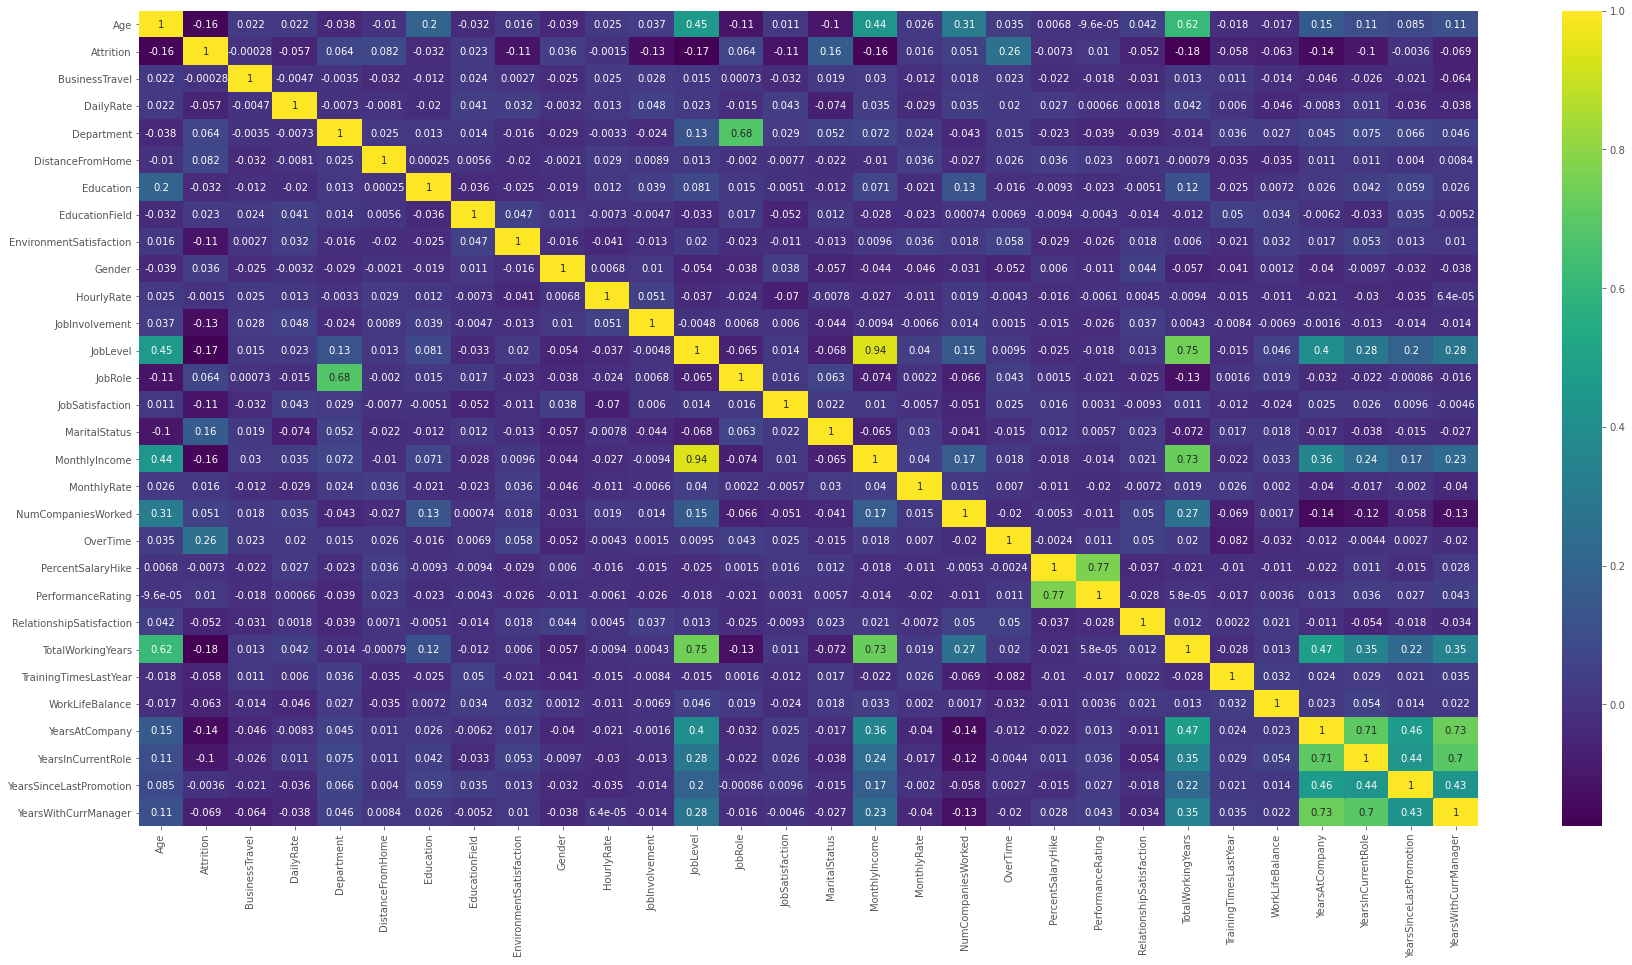

In [73]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(df_cor,annot=True,cmap='viridis')
plt.plot()

# 8.Machine Learning

In [74]:
# dividing features and label

x = df.drop('Attrition',axis=1)
y = df.Attrition

#### Separate response variable and features in x & y.

# StandardScaler

In [77]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.53736349,  0.59428533,  0.73446253, ..., -0.2187891 ,
        -0.23975023,  0.16715159],
       [ 1.44188041, -0.9027941 , -1.30743656, ...,  0.89953891,
        -0.8198338 ,  0.91544224],
       [ 0.08510504,  0.59428533,  1.40682541, ..., -0.13332957,
        -0.23975023, -0.1609255 ],
       ...,
       [-1.04554111,  0.59428533, -1.61508599, ..., -0.96434111,
        -0.23975023, -0.58113906],
       [ 1.44188041, -0.9027941 ,  0.53846007, ...,  0.52676291,
        -0.23975023,  1.28958756],
       [-0.25408881,  0.59428533, -0.44155225, ..., -0.5915651 ,
        -0.8198338 , -0.95528438]])

#### Applying the standard scaler to scaled the dataset in one range & on x variable.

# VIF - variance inflation factor

##### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [78]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.780921,Age
1,1.016595,BusinessTravel
2,1.028846,DailyRate
3,2.077277,Department
4,1.015972,DistanceFromHome
5,1.061018,Education
6,1.021972,EducationField
7,1.021759,EnvironmentSatisfaction
8,1.025349,Gender
9,1.020010,HourlyRate


#### According to my concern about vif in this dataset all the values are less than 10 and overall model variance there is no multicollinearity exists.

# Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting Attrition label , I have used these Algorithmns for Model Building:
#### a)Logistic Regression
#### b)RandomForestClassifier
#### c)Decision Tree Classifier
#### d)XGBoost Model
#### e)AdaBoostClassifier
#### f) KNN

# Train Test  Split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Splitting the dataset into the Training set and Test set.
#### The data should be divided into train and test data.
#### I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.
#### I can set the random state of the split to ensure consistent results.

# KNN

#### The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

### Using SelectKBest Method for best features selection

In [80]:
best_features = SelectKBest(score_func=f_classif,k=12)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(32,'Score'))

               Features_Name      Score
18                  OverTime  97.376687
22         TotalWorkingYears  43.939918
11                  JobLevel  41.489271
14             MaritalStatus  36.669056
15             MonthlyIncome  36.581630
0                        Age  35.788881
25            YearsAtCompany  28.933199
10            JobInvolvement  25.147494
13           JobSatisfaction  18.388406
7    EnvironmentSatisfaction  18.120147
26        YearsInCurrentRole  14.730088
4           DistanceFromHome   9.245992
28      YearsWithCurrManager   6.525752
12                   JobRole   5.670152
3                 Department   5.624900
24           WorkLifeBalance   5.427391
23     TrainingTimesLastYear   4.683116
2                  DailyRate   4.536673
21  RelationshipSatisfaction   3.720702
17        NumCompaniesWorked   3.561779
8                     Gender   1.797139
5                  Education   1.389157
6             EducationField   0.723799
16               MonthlyRate   0.350172


#### After Using SelectKBest method I understand Overtime is the main cause of attrition of employees.

# KNN model Building

#### k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically

In [81]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

#### First I have to fit the Training data of KNN.

In [82]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[285,   7],
       [ 50,   4]], dtype=int64)

In [83]:
knn.score(x_test,y_test)

0.8352601156069365

In [84]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       292
           1       0.36      0.07      0.12        54

    accuracy                           0.84       346
   macro avg       0.61      0.53      0.52       346
weighted avg       0.77      0.84      0.79       346



#### According to my perception of modelling KNeighborsClassifier I got Accuracy Score : 84%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [85]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [86]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [87]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [88]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 3}

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
y_pred = knn.predict(x_test)

In [91]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[285,   7],
       [ 50,   4]], dtype=int64)

In [92]:
knn.score(x_test,y_test)

0.8352601156069365

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       292
           1       0.36      0.07      0.12        54

    accuracy                           0.84       346
   macro avg       0.61      0.53      0.52       346
weighted avg       0.77      0.84      0.79       346



Text(0.5, 1.0, 'KNeighborsClassifier')

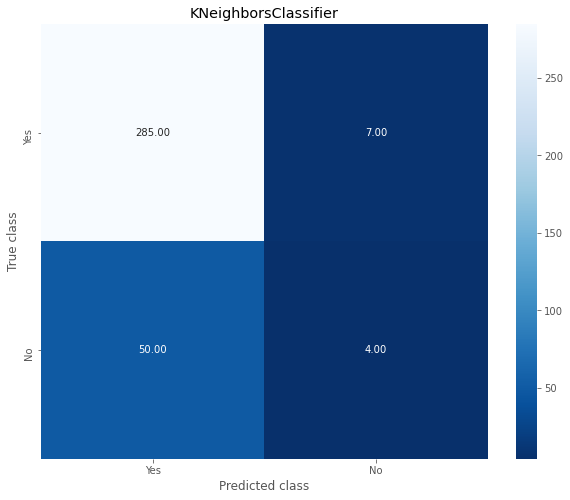

In [94]:
# Finding classification report of knn
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNeighborsClassifier')

#### After modelling KNeighborsClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:

In [95]:
# KNN AUC score
roc_auc_score(y_test,knn.predict(x_test))

0.525050735667174

##### By using Grid Search CV I improve the Accuracy Score : 52.50%

#### In prediction KNeighborsClassifier with Attrition:
#### I had done this prediction by taking Attrition as an output variable which is Classification in nature.
#### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of KNeighborsClassifier - 84%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a no increasing value of KNeighborsClassifier - 84%
#### Then I found roc_auc_score of KNeighborsClassifier which is 52.50%.

# XGBoost Model

##### XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
##### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [96]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### First I have to fit the Training data of XGBoost Model.

In [97]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

1.0

In [98]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8757225433526011

In [99]:
x_test

array([[ 2.00720349,  0.59428533,  0.8461095 , ..., -0.96434111,
        -0.23975023,  0.16715159],
       [-1.27167034,  0.59428533,  0.21096228, ..., -0.2187891 ,
        -0.8198338 , -0.58113906],
       [ 0.19816965,  0.59428533,  0.10675844, ...,  1.27231492,
        -0.23975023, -1.3294297 ],
       ...,
       [-0.02795958, -2.39987353,  0.74190566, ...,  1.27231492,
        -0.23975023,  1.28958756],
       [-1.83699342,  0.59428533,  0.72205731, ..., -0.13332957,
        -0.23975023, -0.1609255 ],
       [ 0.87655734,  0.59428533,  1.5929037 , ...,  2.39064293,
         4.0640313 ,  2.41202353]])

In [100]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       292
           1       0.70      0.35      0.47        54

    accuracy                           0.88       346
   macro avg       0.80      0.66      0.70       346
weighted avg       0.86      0.88      0.86       346



#### According to my perception of modelling XGBoost Model I got Accuracy Score : 88%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [101]:
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [102]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [103]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[15:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.832 total time=   0.1s
[15:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.861 total time=   0.0s
[15:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [104]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 200}

In [105]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[15:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
y_pred = xgb.predict(x_test)

In [107]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[274,  18],
       [ 37,  17]], dtype=int64)

In [108]:
xgb.score(x_test,y_test)

0.8410404624277457

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       292
           1       0.49      0.31      0.38        54

    accuracy                           0.84       346
   macro avg       0.68      0.63      0.65       346
weighted avg       0.82      0.84      0.83       346



Text(0.5, 1.0, 'XGBClassifier')

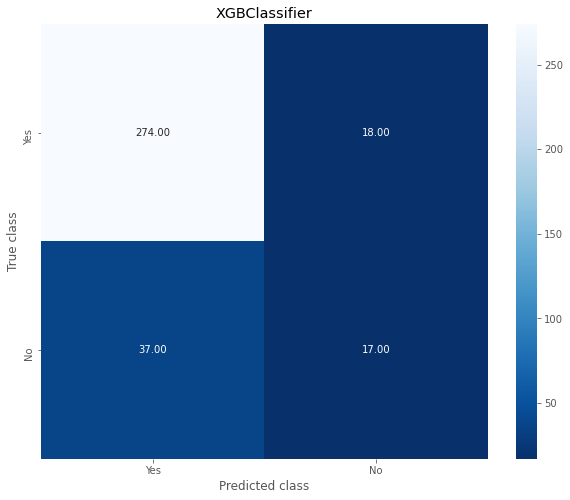

In [110]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 84%
#### After modelling XGBClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.¶
Below is the Roc Score:

In [111]:
# XGBClassifier 
roc_auc_score(y_test,xgb.predict(x_test))

0.6265854895991883

#### In prediction XGBClassifier with Attrition:
#### I had done this prediction by taking Attrition as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of XGBClassifier - 88%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a decreasing value of XGBClassifier - 84%¶
#### Then I found roc_auc_score of XGBClassifier which is 62.65%.

# AdaBoostClassifier

##### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [112]:
ada = AdaBoostClassifier()

In [113]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

#### First I have to fit the Training data of AdaBoostClassifier.

In [114]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.8583815028901735


#### According to my perception of modelling AdaBoostClassifierl I got Accuracy Score : 85.83%.
#### But this score can improve the accuracy by using Grid Search CV.¶

# Hyperparameter tuning for AdaBoost using GridSearchCV

In [115]:
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [116]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [117]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [118]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.22, n_estimators=44)

In [119]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [120]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [121]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[292,   0],
       [ 48,   6]], dtype=int64)

In [122]:
ada.score(x_test,y_test)

0.861271676300578

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       292
           1       1.00      0.11      0.20        54

    accuracy                           0.86       346
   macro avg       0.93      0.56      0.56       346
weighted avg       0.88      0.86      0.81       346



Text(0.5, 1.0, 'AdaBoostClassifier')

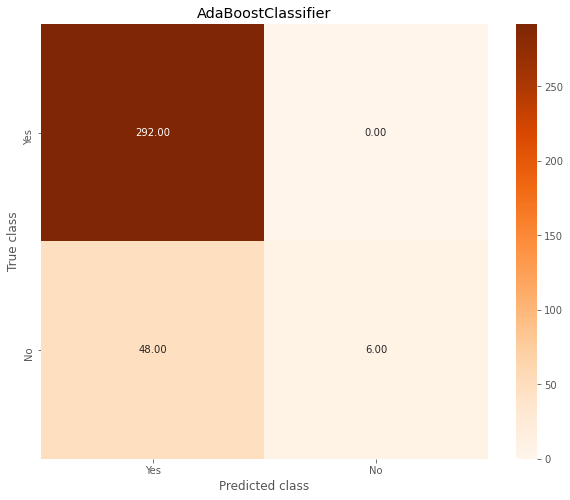

In [123]:
# Finding classification report
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = "Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('AdaBoostClassifier')

In [124]:
# AdaBoostClassifier 
roc_auc_score(y_test,ada.predict(x_test))

0.5555555555555556

### In prediction AdaBoostClassifier with Attrition:
##### I had done this prediction by taking Attrition as an output variable which is Classification in nature.
##### While calculating the best random state the 3700 is best state which providing the highest accuracy value for this model.
#####  After calculating confusion matrix and classification report of AdaBoostClassifier - 85.83%.
##### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of AdaBoostClassifier - 86%
##### Then I found roc_auc_score of AdaBoostClassifier which is 55.55%.

# Decision Tree Classifier

#### Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
#### The tree's branches contain the logic for a decision rule, meaning your data is continually split given the input features. The decision tree classifier is commonly used for image classification, decision analysis, strategy analysis, in medicine for diagnosis, in psychology for behavioral thinking analysis, and more.

In [127]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

#### First I have to fit the Training data of Decision Tree Classifier.

In [128]:
y_pred = dtc.predict(x_test)

In [129]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[252,  40],
       [ 39,  15]], dtype=int64)

In [130]:
dtc.score(x_test,y_test)

0.7716763005780347

In [131]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       292
           1       0.27      0.28      0.28        54

    accuracy                           0.77       346
   macro avg       0.57      0.57      0.57       346
weighted avg       0.77      0.77      0.77       346



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 77%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [132]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [133]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [134]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [135]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [136]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=9,min_samples_split=6)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=6)

In [137]:
y_pred = dtc.predict(x_test)

In [138]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[274,  18],
       [ 40,  14]], dtype=int64)

In [139]:
dtc.score(x_test,y_test)

0.8323699421965318

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       292
           1       0.44      0.26      0.33        54

    accuracy                           0.83       346
   macro avg       0.66      0.60      0.61       346
weighted avg       0.80      0.83      0.81       346



Text(0.5, 1.0, 'DecisionTreeClassifier')

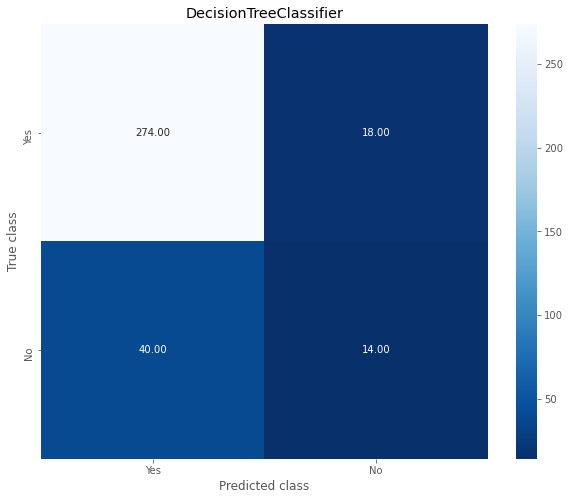

In [140]:
# Finding classification report of DecisionTreeClassifier
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 83%
#### After modelling Decision Tree Classifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:

In [141]:
# Decision Tree Classifier AUC score
roc_auc_score(y_test,dtc.predict(x_test))

0.5988077118214105

### In prediction Decision Tree Classifier with Attrition:
##### I had done this prediction by taking Attrition as an output variable which is Classification in nature.
##### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
##### After calculating confusion matrix and classification report of Decision Tree Classifier - 77%.
##### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of Decision Tree Classifier - 83%
##### Then I found roc_auc_score of RandomForestClassifier which is 59.88%.

# Logistic Regression

#### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regressionis estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variablesthe independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable.
#### The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In [142]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

##### First I have to fit the Training data of Logistic Regression.

In [143]:
y_pred = log_reg.predict(x_test)

In [144]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[275,  17],
       [ 35,  19]], dtype=int64)

In [145]:
log_reg.score(x_test,y_test)

0.8497109826589595

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       292
           1       0.53      0.35      0.42        54

    accuracy                           0.85       346
   macro avg       0.71      0.65      0.67       346
weighted avg       0.83      0.85      0.84       346



Text(0.5, 1.0, 'Logistic Regression')

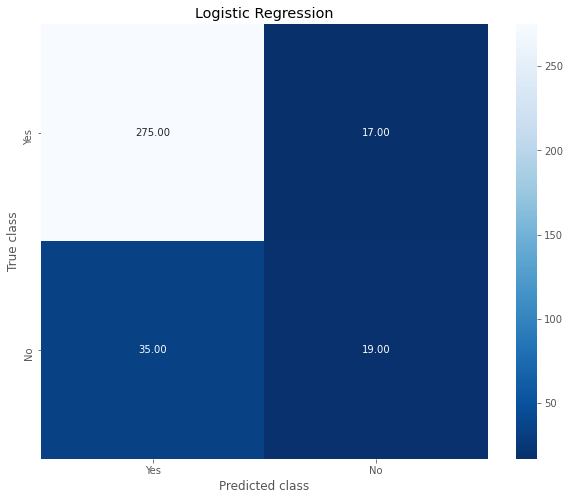

In [146]:
# Finding classification report
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

#### By using Logistic Regression I Get Accuracy Score : 85%
#### After modelling Logistic Regression then my next step is to find Roc Score which will help me to make Roc_Auc Curve.

#### Below is the Roc Score:

In [147]:
# Logistic Regression AUC score
roc_auc_score(y_test,log_reg.predict(x_test))

0.64681633688483

#### In prediction Logistic Regression with Atrition:
#### I had done this prediction by taking Atrition as an output variable which is Classification in nature.
#### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report I used Heat Map of Logistic Regression - 85%
#### Then I found roc_auc_score of Logistic Regression which is 64.68%¶

# RandomForestClassifier

#### A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
#### It works in four steps:
#### Select random samples from a given dataset.
#### Construct a decision tree for each sample and get a prediction result from each decision tree.
#### Perform a vote for each predicted result.
#### Select the prediction result with the most votes as the final prediction.

In [148]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

#### First I have to fit the Training data of RandomForestClassifier.

In [149]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[291,   1],
       [ 50,   4]], dtype=int64)

In [150]:
rfc.score(x_test,y_test)

0.8526011560693642

In [151]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       292
           1       0.80      0.07      0.14        54

    accuracy                           0.85       346
   macro avg       0.83      0.54      0.53       346
weighted avg       0.85      0.85      0.80       346



#### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 85%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [152]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [153]:
rfc = grd.best_estimator_

In [154]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [155]:
y_pred = rfc.predict(x_test)

In [156]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[290,   2],
       [ 43,  11]], dtype=int64)

In [157]:
rfc.score(x_test,y_test)

0.869942196531792

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       292
           1       0.85      0.20      0.33        54

    accuracy                           0.87       346
   macro avg       0.86      0.60      0.63       346
weighted avg       0.87      0.87      0.83       346



Text(0.5, 1.0, 'RandomForestClassifier')

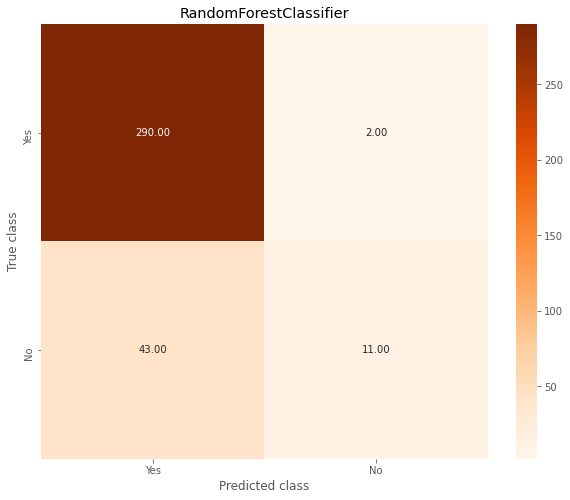

In [159]:
# Finding classification report of RandomForestClassifier
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] ,cmap ="Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RandomForestClassifier')

#### After modelling RandomForestClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:

In [160]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.5984271943176053

#### In prediction RandomForestClassifier with Attrition:
#### I had done this prediction by taking Attrition as an output variable which is Classification in nature.
#### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of RandomForestClassifier - 81%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of RandomForestClassifier - 87%
#### Then I found roc_auc_score of RandomForestClassifier which is 59.84%.

# Roc Curve

### In Machine Learning, performance measurement is an essential task.
### So when it comes to a classification problem, I can count on an AUC - ROC Curve.
### When I need to check or visualize the performance of the multi-class classification problem, I use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.
### It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics).

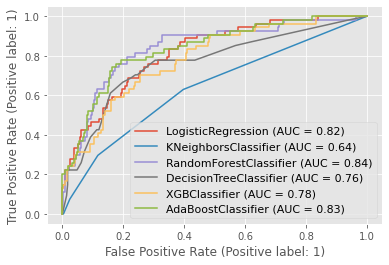

In [161]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# Saving the Best Model

In [162]:
import pickle

In [163]:
# saving the Random Forest Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model Random Forest Model Accuracy Score.
#### So I use Random Forest Model to Save the Best Model.

# Conclusion

#### The conclusion from the above-mentioned analysis would be the following: 
#### The person which is most likely to leave is under 30, single and works overtime. Stock option level also determines the likelihood of employee attrition, as the employee with no option to purchase company stocks has probably lower interest in its overall success than those who can. Money really plays a big role here as it can be seen, that the income of an average employee is almost double that of an average leaver. The most common job roles of leavers — Laboratory Technician, Sales Executive and Sales Representative — are ones with the lowest job level.
    

#### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.
## I’ll briefly discuss how I approached this problem of predicting Attrition prediction.
#### a) I have Attrition Prdiction datastet from which I had to extract information.
#### b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
#### c) After from all datasets, I preprocessed the data using imputer function to fill the missing values and replacing all zeros.
#### d) I did exploratory data analysis on main data frame and tried to remove all the possible outliers.
#### e) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Z - SCORE.
#### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.¶
#### g) After from all these i split the Features & Labels into 2 parts.
#### h) On this data, I have applied our machine learning models such as logistic regression, Random forest,Decision Tree,ADABoost Classifier, XGBoost Classifier and KNN.

#### In the modeling Building section, we have seen the hyperparameter tuned Random Forest has the highest Best Score (0.87).
#### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.